# Trabajo Semanal 12
### Renata Salvati Dávila
***

<img src="./Ejercicio1.png" align="center" width="1500" /> 

<img src="./Hoja1.jpeg" align="center" /> 
<img src="./Hoja2.jpeg" align="center" />
<img src="./Hoja3.jpeg" align="center" />

In [1]:
import sympy as sp

from pytc2.remociones import remover_polo_sigma
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from IPython.display import display, Markdown

s = sp.symbols('s', complex=True)

In [2]:
Z22 = sp.nsimplify((5*s**2 + 43*s + 68)/(s**2 + 5*s + 4))

print_latex(a_equal_b_latex_s('Z_{22}(s)', Z22))

Z, ZRC1, R1, C1 = remover_polo_sigma(Z22, sigma = -1, isImpedance = True, isRC = True)

print_subtitle('Primer remoción: Tanque RC en serie')
print_latex(a_equal_b_latex_s('R_{1}', R1))
print_latex(a_equal_b_latex_s('C_{1}', C1))
print_subtitle('Impedancia resultante')
print_latex(a_equal_b_latex_s('Z', Z))

<IPython.core.display.Math object>

#### Primer remoción: Tanque RC en serie

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Impedancia resultante

<IPython.core.display.Math object>

In [3]:
Za, ZRC2, R2, C2 = remover_polo_sigma(Z, sigma = -4, isImpedance = True, isRC = True)

print_subtitle('Segunda remoción: Tanque RC en serie')
print_latex(a_equal_b_latex_s('R_{2}', R2))
print_latex(a_equal_b_latex_s('C_{2}', C2))
print_subtitle('Impedancia resultante')
print_latex(a_equal_b_latex_s('Z_a', Za))

#### Segunda remoción: Tanque RC en serie

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Impedancia resultante

<IPython.core.display.Math object>

In [4]:
R3 = Za

print_subtitle('Tercer remoción: resistencia en derivación')
print_latex(a_equal_b_latex_s('R_3', R3))

#### Tercer remoción: resistencia en derivación

<IPython.core.display.Math object>

#### Red resultante

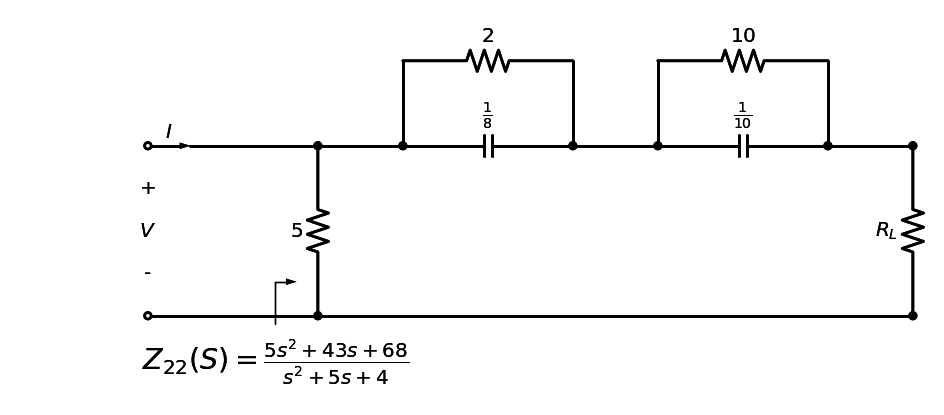

In [5]:
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_puerto_salida, dibujar_funcion_exc_abajo, dibujar_elemento_serie, dibujar_elemento_derivacion, dibujar_tanque_RC_derivacion, dibujar_espacio_derivacion, dibujar_tanque_derivacion, dibujar_tanque_RC_serie, Capacitor, Inductor, Resistor, ResistorIEC

print_subtitle('Red resultante')

d = dibujar_puerto_entrada('', voltage_lbl=('+', '$V$', '-'), current_lbl= '$I$')
d, zz_lbl = dibujar_funcion_exc_abajo(d, 'Z_{22}(S)', Z22, hacia_salida=True, k_gap_width=0.5)
d = dibujar_elemento_derivacion(d, Resistor, R3)
d = dibujar_espacio_derivacion(d)
d = dibujar_tanque_RC_serie(d, sym_R_label= R2, capacitor_lbl= C2)
d = dibujar_espacio_derivacion(d)
d = dibujar_tanque_RC_serie(d, sym_R_label= R1, capacitor_lbl= C1)
d = dibujar_espacio_derivacion(d)
d = dibujar_elemento_derivacion(d, Resistor, 'R_L')

display(d)

In [6]:
#Verificación matricial de la transimpedancia

from pytc2.cuadripolos import Z2Tabcd_s, Y2Tabcd_s, Tabcd2Z_s, Tabcd2Y_s

TR = sp.Matrix([
                    [1, 0],
                    [1/R3, 1]
                ])

TRC1 = sp.Matrix([
                    [1, ZRC2],
                    [0, 1]
                ])

TRC2 = sp.Matrix([
                    [1, ZRC1],
                    [0, 1]
                ])

TRL = sp.Matrix([
                    [1, 1],
                    [0, 1]
                ])

T = TR*TRC1*TRC2*TRL

T = sp.nsimplify(T)
T = sp.expand(T)

print_latex(a_equal_b_latex_s('T', T))

<IPython.core.display.Math object>

In [7]:
D = T[1, 1]

T = sp.factor(1/D)

print_latex(a_equal_b_latex_s('T(s)', T))

<IPython.core.display.Math object>

<img src="./Circuito1.png" align="center" /> 
<img src="./Simulacion1.png" align="center" />

Como $H = \frac{5}{6}$ entonces $Z_{21} = 6H = 5$ en todo el dominio frecuencial

<img src="./Ejercicio2.png" align="center" width="1500" /> 

<img src="./Hoja4.jpeg" align="center" /> 
<img src="./Hoja5.jpeg" align="center" /> 
<img src="./Hoja6.jpeg" align="center" /> 

In [8]:
import numpy as np
from pytc2.remociones import remover_polo_infinito, remover_polo_jw

In [9]:
Z22 = sp.nsimplify((s*(s**2 + 2))/(2*(s**2 + 0.5)))

print_latex(a_equal_b_latex_s('Z_{22}(s)', Z22))

Y = 1/Z22

Z, C1 = remover_polo_infinito(Z22)


print_subtitle('Primer remoción: capacitor en derivación')
print_latex(a_equal_b_latex_s('C_1', C1))
print_subtitle('Impedancia resultante')
print_latex(a_equal_b_latex_s('Z', Z))

<IPython.core.display.Math object>

#### Primer remoción: capacitor en derivación

<IPython.core.display.Math object>

#### Impedancia resultante

<IPython.core.display.Math object>

In [10]:
Y = 1/Z

Ya, L1 = remover_polo_infinito(Y, omega_zero = 3)

print_subtitle('Segunda remoción (parcial): inductor en serie')
print_latex(a_equal_b_latex_s('L_1', L1))
print_subtitle('Admitancia resultante')
print_latex(a_equal_b_latex_s('Y_a', Ya))

#### Segunda remoción (parcial): inductor en serie

<IPython.core.display.Math object>

#### Admitancia resultante

<IPython.core.display.Math object>

In [11]:
Za = 1/Ya

Zb, ZLC, L2, C2 = remover_polo_jw(Za, isImpedance = False)

print_subtitle('Tercer remoción: Tanque LC en derivación')
print_latex(a_equal_b_latex_s('L_{2}', L2))
print_latex(a_equal_b_latex_s('C_{2}', C2))
print_subtitle('Impedancia resultante')
print_latex(a_equal_b_latex_s('Z_b', Zb))

#### Tercer remoción: Tanque LC en derivación

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Impedancia resultante

<IPython.core.display.Math object>

#### Red resultante

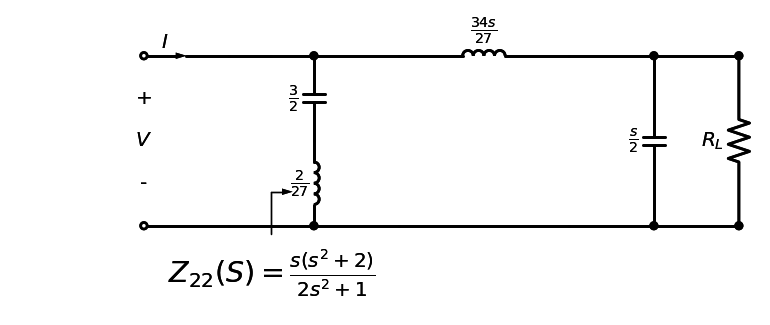

In [12]:
print_subtitle('Red resultante')

d = dibujar_puerto_entrada('', voltage_lbl=('+', '$V$', '-'), current_lbl= '$I$')
d, zz_lbl = dibujar_funcion_exc_abajo(d, 'Z_{22}(S)', Z22, hacia_salida=True, k_gap_width=0.5)
d = dibujar_tanque_derivacion(d, L2, C2)
d = dibujar_espacio_derivacion(d)
d = dibujar_elemento_serie(d, Inductor, L1)
d = dibujar_espacio_derivacion(d)
d = dibujar_elemento_derivacion(d, Capacitor, C1)
d = dibujar_espacio_derivacion(d)
d = dibujar_elemento_derivacion(d, Resistor, 'R_L')

display(d)

In [13]:
#Verificación matricial de la transimpedancia

from pytc2.cuadripolos import Z2Tabcd_s, Y2Tabcd_s, Tabcd2Z_s, Tabcd2Y_s

TLC = sp.Matrix([
                    [1, 0],
                    [1/(s*L2+1/(s*C2)), 1]
                ])

TL1 = sp.Matrix([
                    [1, L1],
                    [0, 1]
                ])

TC1 = sp.Matrix([
                    [1, 0],
                    [C1, 1]
                ])

TRL = sp.Matrix([
                    [1, 0],
                    [1, 1]
                ])

T = TLC*TL1*TC1*TRL

T = sp.nsimplify(T)
T = sp.expand(T)

print_latex(a_equal_b_latex_s('T', T))

<IPython.core.display.Math object>

In [14]:
C = T[1, 0]

T = sp.factor(1/C)

print_latex(a_equal_b_latex_s('T(s)', T))

<IPython.core.display.Math object>

<img src="./Circuito2.png" align="center" /> 
<img src="./Simulacion2.png" align="center" />

Se puede observar claramente el cero ubicado en 3Hz.